In [ ]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from axessettings import AxesSetting, linear_sim

In [ ]:
fig, ax = plt.subplots()
df_fix = pd.read_csv("spectrum_fix.csv")
axstg = AxesSetting(xlim=(200, 850))
fixfunc = lambda x, a, b, c, d, e, f, g: a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6
popt, pcov = curve_fit(fixfunc, df_fix["wavelength"], df_fix["fix"])
print(popt)
ax.plot(df_fix["wavelength"], df_fix["fix"], label="fix")
axstg.plot_func(ax, lambda x: fixfunc(x, *popt), color="red", label="fit")
fixer = lambda x: fixfunc(x, *popt)

In [ ]:
files = {
    "LED": 'LED_5_11.txt',
    "Display (black)": 'disp_black_2000_5.txt',
    "Display (green)": 'disp_green_200_11.txt',
    "Display (white)": 'disp_white_200_11.txt',
    "Sample 1 (center)": 's1_cen_50_11.txt',
    "Sample 3 (edge)": 's3_edge_500_11.txt',
    "Sample 5 (edge)": 's5_edge_96_11.txt',
    "LED lamp": 'LEDlamp_1_11.txt',
    "Display (blue)": 'disp_blue_200_11.txt',
    "Display (magenta)": 'disp_magenta_200_11.txt',
    "Display (yellow)": 'disp_yellow_200_11.txt',
    "Sample 2 (center)": 's2_cen_38_11.txt',
    "Sample 4 (center)": 's4_cen_8_11.txt',
    "Sample 6 (center)": 's6_cen_200_11.txt',
    "LED smartphone": 'SmartphoneLED_50u_11.txt',
    "Display (cyan)": 'disp_cyan_200_11.txt',
    "Display (red)": 'disp_red_200_11.txt',
    "Plasma ball": 'plasma_100_11.txt',
    "Sample 3 (center)": 's3_cen_36_11.txt',
    "Sample 5 (center)": 's5_cen_8_11.txt',
    "Smartphone screen": 'smartphone_white_20_11.txt'
}

In [ ]:
def peak_spectrum(filename, peak_height = 0.1, peak_width=5, peak_prominece=0.1, max_peaks = 4):
    data = pd.read_csv(filename, sep='\t', header = None, skiprows=14, names=['wavelength', 'intensity'])
    data['intensity'] /= fixer(data['wavelength'])
    max_intensity = data['intensity'].max()
    peaks, props = find_peaks(data['intensity'], height=max_intensity*peak_height, width=peak_width, prominence=max_intensity*peak_prominece)
    if (max_peaks):
        peaks = [peaks[i] for i in np.argsort(props["peak_heights"])[-max_peaks:]]
    return data, peaks

In [ ]:
axstg = AxesSetting(legend=False, xlabel="$\lambda$ [nm]", ylabel="Intensity", grid="both", xlim=(200, 900), ylim=(0, None))
for name, filename in files.items():
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    data, peaks = peak_spectrum(f"spectrum_measure/{filename}", 0.2, 5, 0.1)
    ax.plot(data['wavelength'], data['intensity'])
    ax.scatter(data['wavelength'][peaks], data['intensity'][peaks], marker='x', c="red", zorder=2)
    axstg.apply_axes(ax)
    ax.set_title(name)
    for p in peaks:
        ax.annotate(f'{data["wavelength"][p]:.0f}', (data['wavelength'][p], data['intensity'][p]), zorder=5)
    print(name, ", ".join(f'{data["wavelength"][i]:.0f}nm' for i in peaks))
    fig.savefig(f"./images/spectrum/{name}.png")

In [ ]:
file_white = "spectrum_measure/disp_white_200_11.txt"
file_sharp = "spectrum_measure/s1_cen_50_11.txt"
params = [0.1,  5, 0.02]
data, peaks = peak_spectrum(file_white, *params)
data2, peaks2 = peak_spectrum(file_sharp, *params)
axessetting = AxesSetting(legend=True, xlabel="$\lambda$ [nm]", ylabel="Intensity", grid="both", title="Wavelength - Intensity", ylim=(0, None))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(data['wavelength'], data['intensity'], label="Spectrum")
ax.plot(data2['wavelength'], data2['intensity'], label="Spectrum2", c="lime")
ax.scatter(data["wavelength"].iloc[peaks], data["intensity"].iloc[peaks], marker="x", color="red", label="Peaks")
ax.scatter(data2["wavelength"].iloc[peaks2], data2["intensity"].iloc[peaks2], marker="x", color="blue", label="Peaks2")
axessetting.apply_axes(ax)

In [ ]:
files_sample = {
    "Sample 1 (center)": 's1_cen_50_11.txt',
    "Sample 2 (center)": 's2_cen_38_11.txt',
    "Sample 3 (center)": 's3_cen_36_11.txt',
    "Sample 3 (edge)": 's3_edge_500_11.txt',
    "Sample 4 (center)": 's4_cen_8_11.txt',
    "Sample 5 (center)": 's5_cen_8_11.txt',
    "Sample 5 (edge)": 's5_edge_96_11.txt',
    "Sample 6 (center)": 's6_cen_200_11.txt',
}
files_display = {
    "Display (red)": 'disp_red_200_11.txt',
    "Display (green)": 'disp_green_200_11.txt',
    "Display (blue)": 'disp_blue_200_11.txt',
    "Display (cyan)": 'disp_cyan_200_11.txt',
    "Display (magenta)": 'disp_magenta_200_11.txt',
    "Display (yellow)": 'disp_yellow_200_11.txt',
    "Display (white)": 'disp_white_200_11.txt',
}
files_other = {
    "Plasma ball": 'plasma_100_11.txt',
    "LED": 'LED_5_11.txt',
    "LED smartphone": 'SmartphoneLED_50u_11.txt',
    "LED lamp": 'LEDlamp_1_11.txt',
}

In [ ]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 16))
axstg = AxesSetting(legend=False, grid="both", xlim=(200, 850), ylim=(0, None))
for i, (name, filename) in enumerate(files_sample.items()):
    ax = axes[i//2, i%2]
    data, peaks = peak_spectrum(f"spectrum_measure/{filename}", 0.2, 5, 0.1)
    ax.plot(data['wavelength'], data['intensity'])
    ax.scatter(data['wavelength'][peaks], data['intensity'][peaks], marker='x', c="red", zorder=2)
    axstg.apply_axes(ax)
    ax.set_title(name)
    for p in peaks:
        ax.annotate(f'{data["wavelength"][p]:.0f}', (data['wavelength'][p], data['intensity'][p]), zorder=5, fontsize=15)
fig.tight_layout()
fig.text(0.5, 0, "Wavelength $\lambda$ [nm]", ha='center', va='center', fontsize=15)
fig.text(0.0, 0.5, "Intensity", ha='center', va='center', rotation='vertical', fontsize=15)

In [ ]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 16))
axstg = AxesSetting(legend=False, grid="both", xlim=(200, 850), ylim=(0, None))
for i, (name, filename) in enumerate(files_display.items()):
    ax = axes[i//2, i%2]
    data, peaks = peak_spectrum(f"spectrum_measure/{filename}", 0.2, 5, 0.1)
    ax.plot(data['wavelength'], data['intensity'])
    ax.scatter(data['wavelength'][peaks], data['intensity'][peaks], marker='x', c="red", zorder=2)
    axstg.apply_axes(ax)
    ax.set_title(name)
    for p in peaks:
        ax.annotate(f'{data["wavelength"][p]:.0f}', (data['wavelength'][p], data['intensity'][p]), zorder=5, fontsize=15)
fig.tight_layout()
fig.text(0.5, 0, "Wavelength $\lambda$ [nm]", ha='center', va='center', fontsize=15)
fig.text(0.0, 0.5, "Intensity", ha='center', va='center', rotation='vertical', fontsize=15)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12, 8))
axstg = AxesSetting(legend=False, grid="both", xlim=(200, 850), ylim=(0, None))
for i, (name, filename) in enumerate(files_other.items()):
    ax = axes[i//2, i%2]
    data, peaks = peak_spectrum(f"spectrum_measure/{filename}", 0.2, 5, 0.1)
    ax.plot(data['wavelength'], data['intensity'])
    ax.scatter(data['wavelength'][peaks], data['intensity'][peaks], marker='x', c="red", zorder=2)
    axstg.apply_axes(ax)
    ax.set_title(name)
    for p in peaks:
        ax.annotate(f'{data["wavelength"][p]:.0f}', (data['wavelength'][p], data['intensity'][p]), zorder=5, fontsize=15)
fig.tight_layout()
fig.text(0.5, 0, "Wavelength $\lambda$ [nm]", ha='center', va='center', fontsize=15)
fig.text(0.0, 0.5, "Intensity", ha='center', va='center', rotation='vertical', fontsize=15)

In [93]:
SP02 = 89297.4-63007.7
SP13 = 91291.3-64654.9
SP24 = 93231.8-66273.3
SP35 = 95105.8-67862.6
ls_SP02 = [SP02, SP13, SP24, SP35]
for s in ls_SP02:
    print(f"{1239.85/(s/8065.5):.0f}")

380
375
371
367


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


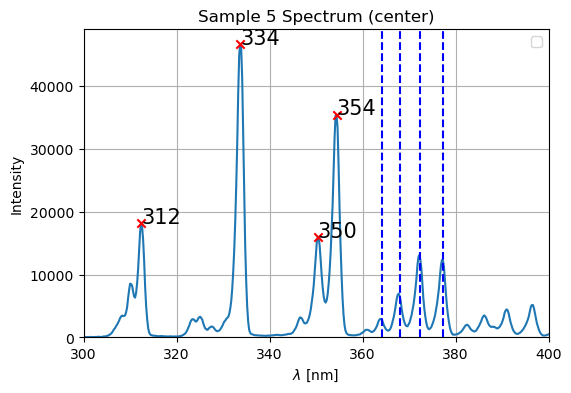

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
filename = "s5_cen_8_11.txt"
data, peaks = peak_spectrum(f"spectrum_measure/{filename}", 0.2, 5, 0.1)
axstg = AxesSetting(title="Sample 5 Spectrum (center)", xlabel="$\lambda$ [nm]", ylabel="Intensity", grid="both", xlim=(300, 400), ylim=(0, None))
ax.plot(data['wavelength'], data['intensity'])
ax.scatter(data['wavelength'][peaks], data['intensity'][peaks], marker='x', c="red", zorder=2)
axstg.apply_axes(ax)
ax.set_title(name)
for p in peaks:
    ax.annotate(f'{data["wavelength"][p]:.0f}', (data['wavelength'][p], data['intensity'][p]), zorder=5, fontsize=15)
axstg.apply_axes(ax)
for s in ls_SP02:
    ax.axvline(1239.85/(s/8065.5)-3, color="blue", linestyle="--")

[7626.04087513   16.00036908]


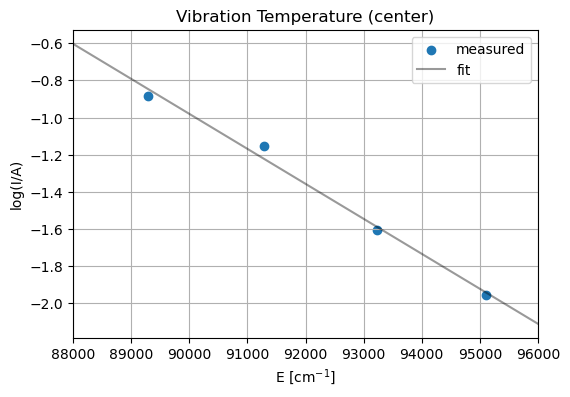

In [97]:
data_N = [
    [95105.8, 2.4e6, 2720.88],
    [93231.8, 4.07e6, 6518.74],
    [91291.3, 4.93e6, 12425.55],
    [89297.4, 3.53e6, 11640.88],
]
df_temp = pd.DataFrame(data_N, columns=["E", "A", "I"])
df_temp["log"] = np.log(df_temp["I"]/8e-3/df_temp["A"])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
axstg = AxesSetting(title="Vibration Temperature (center)", xlabel="E [cm$^{-1}$]", ylabel="log(I/A)", grid="both", xlim=(8.8e4, 9.6e4))
ax.scatter(df_temp["E"], df_temp["log"], label="measured")
fitfn = lambda E, T, Z: -1.4388*E/T + Z
popt2, pcov2 = curve_fit(fitfn, df_temp["E"], df_temp["log"])
axstg.plot_func(ax, lambda x: fitfn(x, *popt2), color="black", alpha=0.4, label="fit")
# axstg.plot_func(ax, lambda x: fitfn(x, 4000, 22), color="blue", label="SP35")
print(popt2)
axstg.apply_axes(ax)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[4022.70490331   28.64323956]


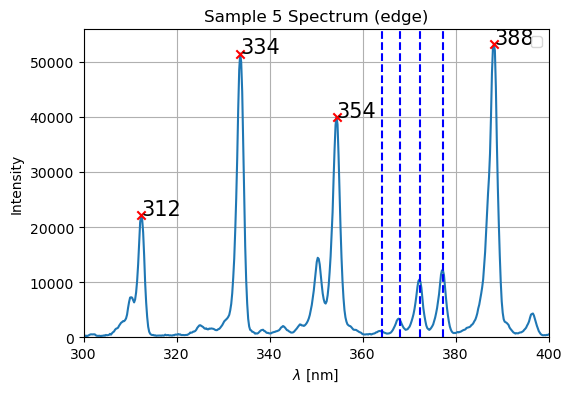

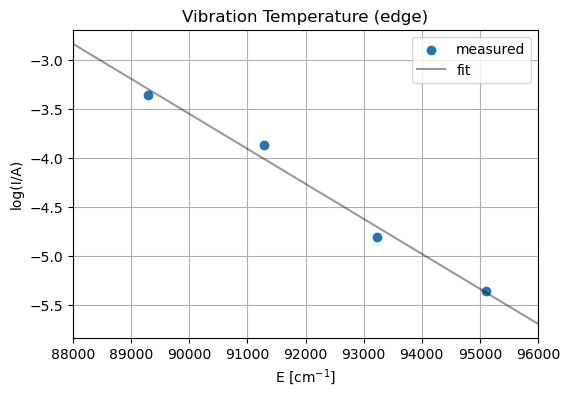

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
filename = "s5_edge_96_11.txt"
data, peaks = peak_spectrum(f"spectrum_measure/{filename}", 0.2, 5, 0.1)
axstg = AxesSetting(title="Sample 5 Spectrum (edge)", xlabel="$\lambda$ [nm]", ylabel="Intensity", grid="both", xlim=(300, 400), ylim=(0, None))
ax.plot(data['wavelength'], data['intensity'])
ax.scatter(data['wavelength'][peaks], data['intensity'][peaks], marker='x', c="red", zorder=2)
axstg.apply_axes(ax)
ax.set_title(name)
for p in peaks:
    ax.annotate(f'{data["wavelength"][p]:.0f}', (data['wavelength'][p], data['intensity'][p]), zorder=5, fontsize=15)
axstg.apply_axes(ax)
for s in ls_SP02:
    ax.axvline(1239.85/(s/8065.5)-3, color="blue", linestyle="--")

data_N = [
    [95105.8, 2.4e6, 1089.99],
    [93231.8, 4.07e6, 3196.17],
    [91291.3, 4.93e6, 9945.68],
    [89297.4, 3.53e6, 11787.61],
]
df_temp = pd.DataFrame(data_N, columns=["E", "A", "I"])
df_temp["log"] = np.log(df_temp["I"]/9.6e-2/df_temp["A"])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
axstg = AxesSetting(title="Vibration Temperature (edge)", xlabel="E [cm$^{-1}$]", ylabel="log(I/A)", grid="both", xlim=(8.8e4, 9.6e4))
ax.scatter(df_temp["E"], df_temp["log"], label="measured")
fitfn = lambda E, T, Z: -1.4388*E/T + Z
popt2, pcov2 = curve_fit(fitfn, df_temp["E"], df_temp["log"])
axstg.plot_func(ax, lambda x: fitfn(x, *popt2), color="black", alpha=0.4, label="fit")
# axstg.plot_func(ax, lambda x: fitfn(x, 4000, 22), color="blue", label="SP35")
print(popt2)
axstg.apply_axes(ax)